# **Análise dos acidentes na cidade do Recife em 2022**

Dados obtidos no Portal de Dados da Prefeitura do Recife

http://dados.recife.pe.gov.br/dataset/acidentes-de-transito-com-e-sem-vitimas/resource/971e0228-fa9c-4a42-b360-c842b29d2f56

## **Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

## **Carregando os dados em DataFrame**

In [2]:
dados_acidentes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Arquivos/acidentes2022.csv", sep=';')
dados_acidentes.head()

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,...,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
2,"202200025,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,CAXANGÁ,AV CAXANGA,NaN,NaN,PROX AO CRUZAMENTO DE SAN MARTIN E/F A IGREJA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"202200029,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,JOANA BEZERRA,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,ENFRENTE AO FORUM DE JOANA BEZERRA SENTIDO BOA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"202200082,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,"432,0",RUA CARNEIRO VILELA,PRÓX AO CAMPO DO NAUTICO,...,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN


## **Fazendo a limpeza e tratamento dos dados**

In [3]:
# Remoção de algumas colunas

dados_acidentes.drop(columns=['Protocolo', 'situacao', 'hora', 'complemento', 'sentido_via', 'detalhe_endereco_acidente', 'divisao_via2', 'divisao_via3'], inplace=True)
dados_acidentes.columns

Index(['data', 'natureza', 'bairro', 'endereco', 'numero', 'bairro_cruzamento',
       'num_semaforo', 'tipo', 'auto', 'moto', 'ciclom', 'ciclista',
       'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas',
       'vitimasfatais', 'acidente_verificado', 'tempo_clima',
       'situacao_semaforo', 'sinalizacao', 'condicao_via', 'conservacao_via',
       'ponto_controle', 'situacao_placa', 'velocidade_max_via', 'mao_direcao',
       'divisao_via1'],
      dtype='object')

In [4]:
# convertendo coluna data de objeto para datetime
dados_acidentes["data"] = pd.to_datetime(dados_acidentes["data"])

In [5]:
# convertendo colunas de objeto para números

# removendo ',' das células
for coluna in ['numero', 'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas', 'vitimasfatais']:
  dados_acidentes[coluna] = dados_acidentes[coluna].str.split(',').str[0]

# convertendo a coluna 'numero' pois ela possuia caracteres de str
dados_acidentes['numero'] = pd.to_numeric(dados_acidentes['numero'], errors='coerce', downcast='integer')

# convertendo as demais colunas em int
dados_acidentes[['auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas', 'vitimasfatais']] = dados_acidentes[['auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas', 'vitimasfatais']].astype(str).astype(float).astype(int)

dados_acidentes[['numero', 'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas', 'vitimasfatais']]

,numero,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,130.0,1,1,0,0,0,0,0,0,0,1,0
1,NaN,2,0,0,0,0,0,0,0,0,0,0
2,NaN,1,1,0,0,0,0,0,0,0,2,0
3,NaN,1,1,0,0,0,0,0,0,0,1,0
4,432.0,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2664,NaN,0,1,0,0,0,1,0,0,0,2,0
2665,2997.0,1,0,0,0,0,0,0,1,0,0,0
2666,401.0,1,1,0,0,0,0,0,0,0,1,0
2667,NaN,0,2,0,0,0,0,0,0,0,3,0


In [6]:
# Padronizando a coluna de velocidade max

def clean_speed(speed):
    if pd.isnull(speed):
        return np.nan
    else:
        speed = str(speed).lower()
        speed = re.sub('[^a-zA-Z0-9]', '', speed)
        return speed

dados_acidentes['velocidade_max_via'] = dados_acidentes['velocidade_max_via'].apply(clean_speed)

In [7]:
# Adicionando coluna de mês

dados_acidentes['mes'] = dados_acidentes['data'].dt.month

In [ ]:
dados_acidentes.shape

(2669, 31)

In [ ]:
dados_acidentes.dtypes

data                   datetime64[ns]
natureza                       object
bairro                         object
endereco                       object
numero                        float64
bairro_cruzamento              object
num_semaforo                   object
tipo                           object
auto                            int64
moto                            int64
ciclom                          int64
ciclista                        int64
pedestre                        int64
onibus                          int64
caminhao                        int64
viatura                         int64
outros                          int64
vitimas                         int64
vitimasfatais                   int64
acidente_verificado            object
tempo_clima                    object
situacao_semaforo              object
sinalizacao                    object
condicao_via                   object
conservacao_via                object
ponto_controle                 object
situacao_pla

# **Fazendo a exploração dos dados!**

## **Quantidade de acidentes, vítimas e vítimas fatais por rua**

In [10]:
vitimas_endereco = dados_acidentes.groupby('endereco').agg({'vitimas': 'sum', 'vitimasfatais': 'sum'})
vitimas_endereco['quantidade de acidentes'] = dados_acidentes['endereco'].value_counts()
vitimas_endereco['proporcao de vítimas'] = vitimas_endereco['vitimas']/vitimas_endereco['quantidade de acidentes']
vitimas_endereco.sort_values('vitimas', ascending=False).head(20)

,vitimas,vitimasfatais,quantidade de acidentes,proporcao de vítimas
endereco,,,,
AV CAXANGA,117,2,109,1.073394
AV GOVERNADOR AGAMENON MAGALHAES,107,1,128,0.835938
AV RECIFE,97,1,84,1.154762
AV NORTE MIGUEL ARRAES DE ALENCAR,87,0,89,0.977528
AV BEBERIBE,79,0,64,1.234375
AV DR JOSE RUFINO,71,0,72,0.986111
AV MARECHAL MASCARENHAS DE MORAES,60,1,71,0.845070
AV ENGENHEIRO ABDIAS DE CARVALHO,44,5,51,0.862745
AV ENGENHEIRO DOMINGOS FERREIRA,44,0,50,0.880000


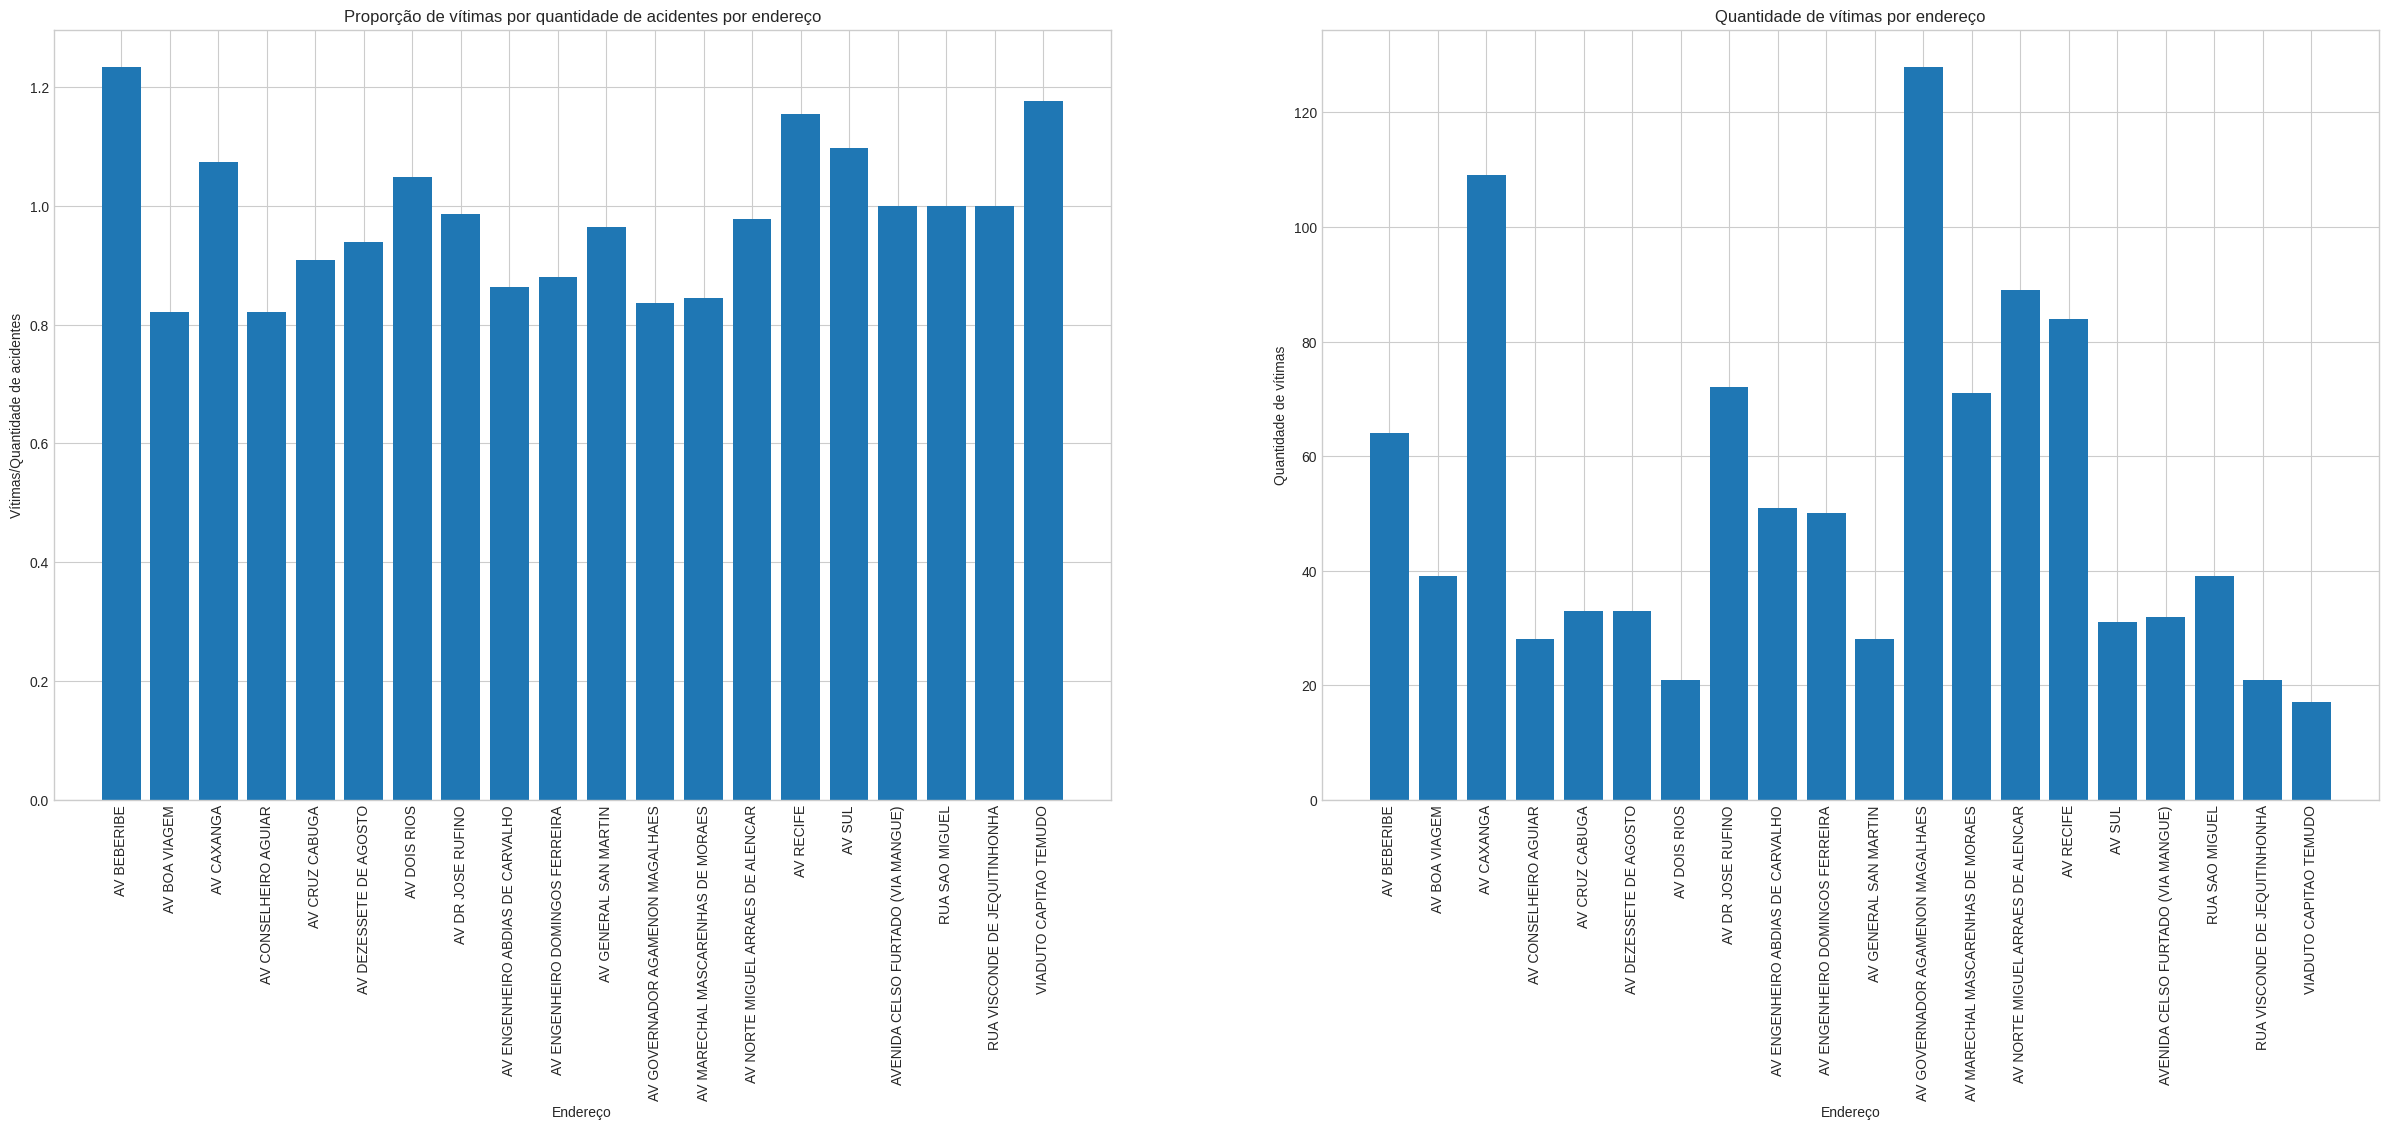

In [ ]:
# Visualização da tabela de acidentes por endereço

plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(30, 10),
                              sharex=True)

# pegando apenas ocorrencias com mais de 29 vitimas
dados_filtrados = vitimas_endereco[vitimas_endereco['vitimas']>19]

ax0.bar(dados_filtrados.index,(dados_filtrados['vitimas']/dados_filtrados['quantidade de acidentes']))

ax0.set(title='Proporção de vítimas por quantidade de acidentes por endereço',
       xlabel='Endereço',
       ylabel='Vítimas/Quantidade de acidentes')

for tick in ax0.get_xticklabels():
    tick.set_rotation(90)


# -----------------------

ax1.bar(dados_filtrados.index, dados_filtrados['quantidade de acidentes'])

ax1.set(title='Quantidade de vítimas por endereço',
       xlabel='Endereço',
       ylabel='Quantidade de vítimas');

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

A Av. Beberibe teve a maior proporção de acidentes, havendo mais de 1.2 vítimas a cada acidentes, em contrapartida, a Av. Governador Agamenon Magalhães teve a maior quantidade de vítimas no geral, seguida pela Av. Caxanga.

## **Quantidade de acidentes, vítimas e vítimas fatais por velocidade máxima da via**

In [11]:
vitimas_velocidade = dados_acidentes.groupby('velocidade_max_via').agg({'vitimas': 'sum', 'vitimasfatais': 'sum'})
vitimas_velocidade['quantidade de acidentes'] = dados_acidentes['velocidade_max_via'].value_counts()
vitimas_velocidade['proporcao de vítimas'] = vitimas_velocidade['vitimas']/vitimas_velocidade['quantidade de acidentes']
vitimas_velocidade.sort_values('vitimas', ascending=False).head(25)

,vitimas,vitimasfatais,quantidade de acidentes,proporcao de vítimas
velocidade_max_via,,,,
60kmh,451,7,441,1.022676
40kmh,178,1,168,1.059524
30kmh,110,0,120,0.916667
50kmh,28,0,30,0.933333
20kmh,5,0,8,0.625000


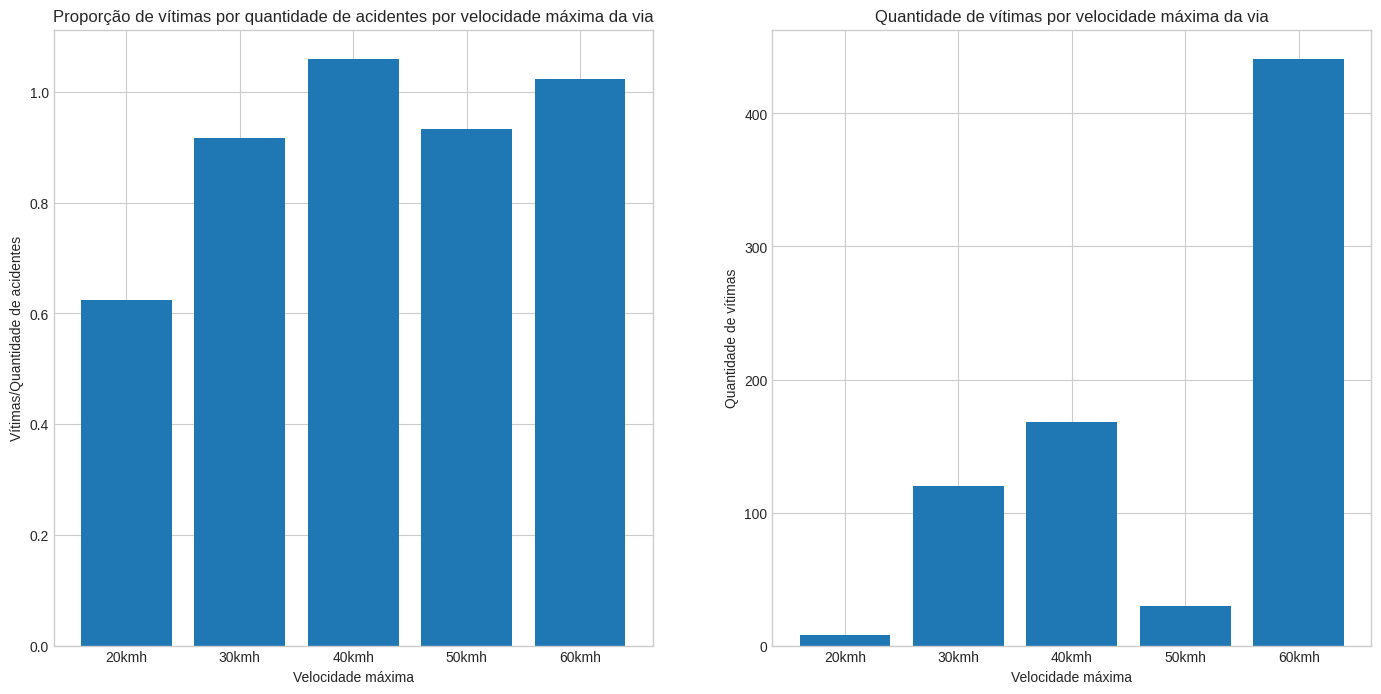

In [ ]:
# Visualização da tabela de velocidade máxima

plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(17, 8),
                              sharex=True)

ax0.bar(list(vitimas_velocidade.index),(vitimas_velocidade['vitimas']/vitimas_velocidade['quantidade de acidentes']))

ax0.set(title='Proporção de vítimas por quantidade de acidentes por velocidade máxima da via',
       xlabel='Velocidade máxima',
       ylabel='Vítimas/Quantidade de acidentes')


# -----------------------

ax1.bar(list(vitimas_velocidade.index),vitimas_velocidade['quantidade de acidentes'])

ax1.set(title='Quantidade de vítimas por velocidade máxima da via',
       xlabel='Velocidade máxima',
       ylabel='Quantidade de vítimas');

A velocidade máxima de 40 km/h obteve a maior proporção de vítimas, mas a 60 km/h, a quantidade de vítimas foi maior, além de ser culpada por uma quantidade sete vezes maior de vítimas fatais

## **Quantos acidentes por cada clima diferente?**

In [12]:
climas = dados_acidentes.groupby('tempo_clima').agg({'vitimas': 'sum', 'vitimasfatais': 'sum'})
climas['quantidade de acidentes'] = dados_acidentes['tempo_clima'].value_counts()
climas['proporcao de vítimas'] = climas['vitimas']/climas['quantidade de acidentes']
climas.sort_values('vitimas', ascending=False).head(25)

,vitimas,vitimasfatais,quantidade de acidentes,proporcao de vítimas
tempo_clima,,,,
Bom,1781,14,1789,0.995528
Chuvoso,296,6,309,0.957929
Nublado,10,0,13,0.769231


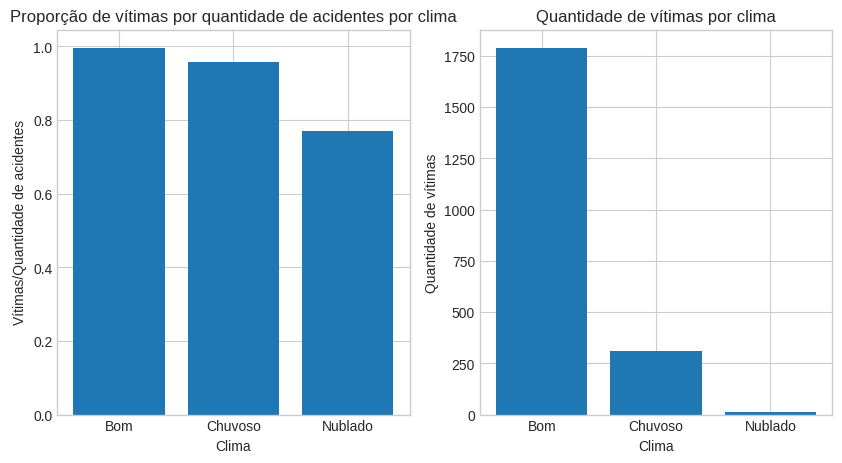

In [ ]:
# Visualização da tabela de clima diferente

plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(10, 5),
                              sharex=True)

ax0.bar(list(climas.index),(climas['vitimas']/climas['quantidade de acidentes']))

ax0.set(title='Proporção de vítimas por quantidade de acidentes por clima',
       xlabel='Clima',
       ylabel='Vítimas/Quantidade de acidentes')


# -----------------------

ax1.bar(list(climas.index),climas['quantidade de acidentes'])

ax1.set(title='Quantidade de vítimas por clima',
       xlabel='Clima',
       ylabel='Quantidade de vítimas');

Não parece haver uma relação entre o tipo de clima e a proporção de vítimas por acidente

# **Quantidade de acidentes, vítimas e vítimas fatais por tipo de acidente**

In [14]:
vitimas_tipo = dados_acidentes.groupby('tipo').agg({'vitimas': 'sum', 'vitimasfatais': 'sum'})
vitimas_tipo['quantidade de acidentes'] = dados_acidentes['tipo'].value_counts()
vitimas_tipo['proporcao de vítimas'] = vitimas_tipo['vitimas']/vitimas_tipo['quantidade de acidentes']
vitimas_tipo.sort_values('vitimas', ascending=False).head(25)

,vitimas,vitimasfatais,quantidade de acidentes,proporcao de vítimas
tipo,,,,
COLISÃO LATERAL,818,3,838,0.976134
COLISÃO TRASEIRA,409,3,483,0.846791
COLISÃO TRANSVERSAL,334,1,306,1.091503
COLISÃO FRONTAL,318,0,312,1.019231
ATROPELAMENTO DE PESSOA,231,5,203,1.137931
COLISÃO COM CICLISTA,142,1,128,1.109375
QUEDA,88,2,79,1.113924
CHOQUE,85,6,165,0.515152
ENGAVETAMENTO,10,0,8,1.250000


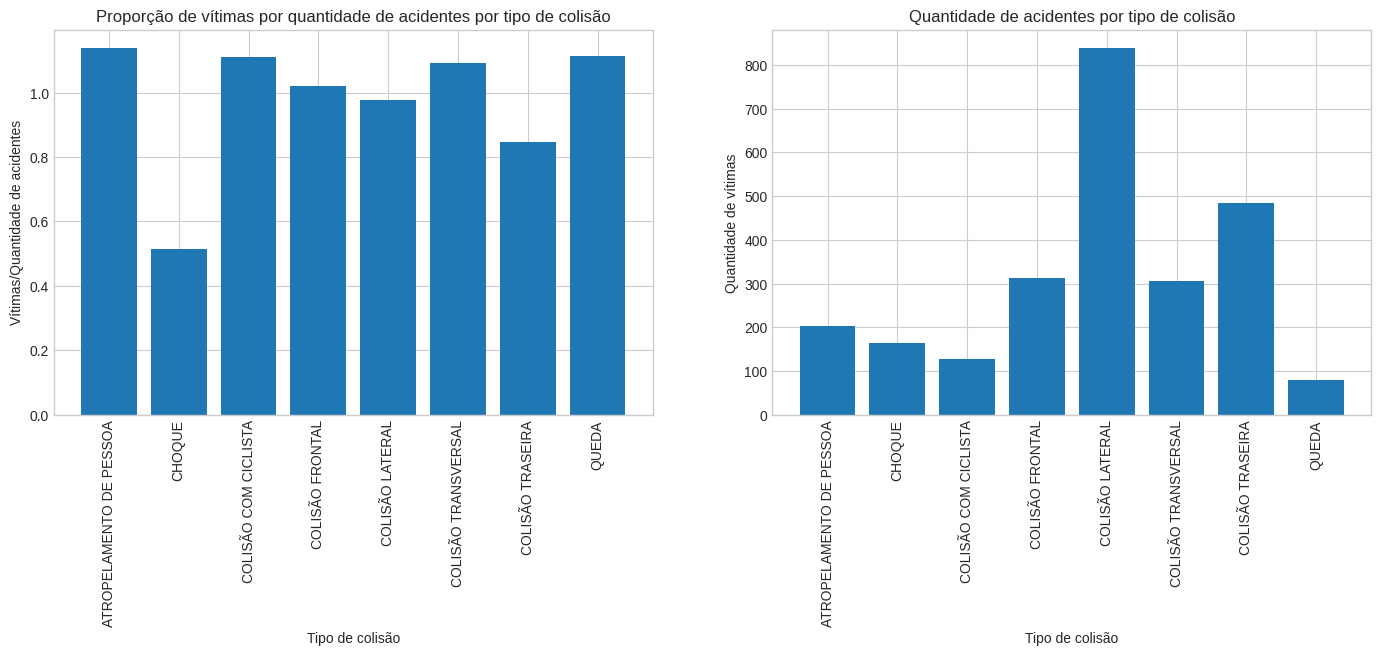

In [16]:
# Visualização da tabela de tipo de colisão

plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(17, 5),
                              sharex=True)

# pegando apenas ocorrencias com mais de 10 vitimas
dados_filtrados = vitimas_tipo[vitimas_tipo['vitimas']>10]

ax0.bar(dados_filtrados.index,(dados_filtrados['vitimas']/dados_filtrados['quantidade de acidentes']))

ax0.set(title='Proporção de vítimas por quantidade de acidentes por tipo de colisão',
       xlabel='Tipo de colisão',
       ylabel='Vítimas/Quantidade de acidentes')

for tick in ax0.get_xticklabels():
    tick.set_rotation(90)


# -----------------------

ax1.bar(dados_filtrados.index, dados_filtrados['quantidade de acidentes'])

ax1.set(title='Quantidade de acidentes por tipo de colisão',
       xlabel='Tipo de colisão',
       ylabel='Quantidade de vítimas');

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

Choque é o tipo de acidente que menos causa vítimas proporcionalmente a quantidade de acidentes e a colisão lateral é o tipo de acidente mais ocorrente

# **Meses com maior número de acidentes e vitimas**

In [ ]:
acidentes_mes = dados_acidentes.groupby('mes').agg({'vitimas': 'sum', 'vitimasfatais': 'sum'})
acidentes_mes['quantidade de acidentes'] = dados_acidentes['mes'].value_counts()
acidentes_mes.sort_values('mes', ascending=True)

,vitimas,vitimasfatais,quantidade de acidentes
mes,,,
1,182,3,211
2,158,3,188
3,176,1,193
4,168,4,186
5,182,1,200
6,212,2,217
7,200,2,219
8,239,0,258
9,242,0,253


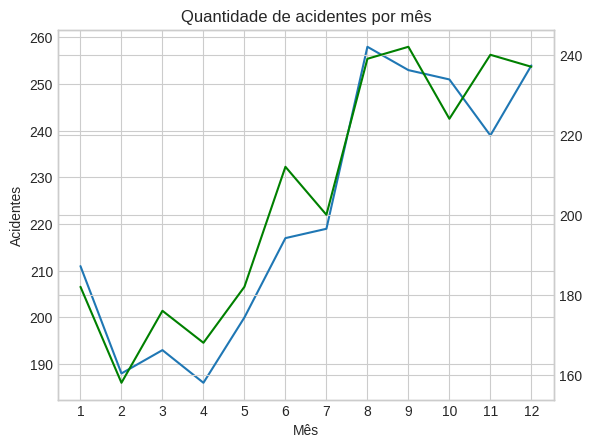

In [ ]:
# Visualização dos dados

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(acidentes_mes.index, acidentes_mes['quantidade de acidentes'])
ax.set_xticks(acidentes_mes.index)

ax.set(title='Quantidade de acidentes por mês',
       xlabel='Mês',
       ylabel="Acidentes")

ax2.plot(acidentes_mes.index, acidentes_mes['vitimas'], color='g');

O mês de abril foi o mês que menos teve acidente no ano, em compensação, os meses de Agosto, Setembro, Outubro e Dezembro tiveram mais do que 250 acidentes cada.